In [34]:
import numpy as np
from matplotlib import pyplot as plt

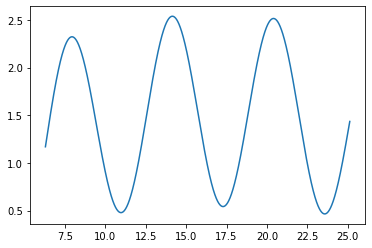

In [35]:
f = lambda x: np.sin(x) + 2*np.log(x) - np.sqrt(x)
x = np.arange(2*np.pi, 8*np.pi, 0.001)

plt.plot(x, f(x))

In [36]:

def random_ab(a, b):
    return (b-a)*np.random.random() + a

def random_walk(f, domain, max_iter=1000, verbose=False):
    x_star = None
    for i in range(max_iter):
        x = random_ab(domain[0], domain[1])
        if (x_star == None) or (f(x) > f(x_star)):
            x_star = x
        if verbose: print(x, f(x))
    return x_star

def hill_climb(f, domain, x0, epsilon=1e-3, max_iter=1000, verbose=False):
    x_star = x0
    for i in range(max_iter):
        if verbose: print(x_star, f(x_star))
        x_left = x_star - epsilon
        x_right = x_star + epsilon
        if (f(x_star) > f(x_left)) and (f(x_star) > f(x_right)):
            return x_star #local maxima
        elif (f(x_star) < f(x_left)) and (f(x_star) < f(x_right)): # local minima
            if f(x_left) > f(x_right):
                x_star = x_left
            else:
                x_star = x_right
        elif f(x_star) < f(x_left): # move left
            x_star = x_left
        elif f(x_star) < f(x_right): # move right
            x_star = x_right
    return x_star

In [37]:
random_walk(f, domain=[2*np.pi, 8*np.pi], max_iter=10, verbose=True)

11.85985136837947 0.8533140740138991
13.980458124863649 2.5240222117752906
13.121120418723413 2.0528682837184027
18.553617845112658 1.242301256870892
24.439636974691922 0.8098381844416043
11.19765606051524 0.5054681872986242
19.678142651995998 2.2599886142490213
22.081702335355434 1.3999513927082852
16.119328805595522 1.1452884860500925
17.519465501063266 0.569829158719636


13.980458124863649

In [38]:
hill_climb(f, domain=[2*np.pi, 8*np.pi], x0=20, epsilon=1e-2, max_iter=100, verbose=True)

20 2.4322738428360298
20.01 2.436190804372557
20.020000000000003 2.440015848436169
20.030000000000005 2.4437485809789434
20.040000000000006 2.4473886171615575
20.050000000000008 2.4509355813918017
20.06000000000001 2.4543891073621653
20.07000000000001 2.4577488380864994
20.080000000000013 2.461014425935743
20.090000000000014 2.464185532672719
20.100000000000016 2.46726182948598
20.110000000000017 2.47024299702273
20.12000000000002 2.4731287254207786
20.13000000000002 2.475918714339559
20.140000000000022 2.4786126729901996
20.150000000000023 2.4812103201646174
20.160000000000025 2.4837113842636818
20.170000000000027 2.4861156033243956
20.180000000000028 2.48842272504612
20.19000000000003 2.4906325068158415
20.20000000000003 2.492744715732454
20.210000000000033 2.494759128630079
20.220000000000034 2.496675532100417
20.230000000000036 2.498493722514109
20.240000000000038 2.500213506041135
20.25000000000004 2.501834698670222
20.26000000000004 2.503357126227277
20.270000000000042 2.50478062

20.410000000000064

In [39]:
f(20.41)

2.514253570368668

In [40]:
f(9*np.pi/2)

2.5376721533048476

# Simulated Annealing

In [41]:
def metropolis(f_x, f_x_star, t):
    delta = f_x_star - f_x
    if delta > 0:
        return True
    else:
        return np.random.random() < np.exp(-delta/t)

In [42]:
def SA(f, peturb, sol, per_temp, t0, alpha, tol=1e-3, verbose=False):
    T = t0
    if verbose: print("initial guess: {0}, quality: {1}".format(sol, f(sol)))
    while T>tol:
        for _ in range(per_temp):
            sol_new = peturb(sol)
            if metropolis(f(sol), f(sol_new), T):
                sol = sol_new
        if verbose: print("Best Guess at T={0}: {1}, quality: {2}".format(T, sol, f(sol)))
        T *= alpha
    if verbose: print("Best Guess: {0}, quality: {1}".format(sol, f(sol)))
    return sol, f(sol)

In [43]:
def peturb_TSP(sol):
    idxs = range(len(sol))
    first, second = np.random.choice(idxs, size=2, replace=False)
    sol[first], sol[second] = sol[second], sol[first]
    return sol

In [48]:
def quality_TSP_Gen(M):
    def quality_TSP(sol):
        cost = 0
        for i in range(len(sol)):
            cost += M[sol[i-1], sol[i]]
        if cost == 0:
            return 1e-10
        else:
            return 1/cost
    return quality_TSP

In [49]:
T = np.array([
    [0, 2053, 1155, 3017, 1385],
    [2053, 0, 1080, 3415, 939],
    [1155, 1080, 0, 3940, 285],
    [3017, 3415, 3940, 0, 3975],
    [1385, 939, 285, 3975, 0]
    ])

f = quality_TSP_Gen(T)
sol_0 = [0, 1, 2, 3, 4]

In [50]:
SA(f=f, peturb=peturb_TSP, sol=sol_0, per_temp=10, t0=1, alpha=0.95, tol=1e-3, verbose=True)

initial guess: [0, 1, 2, 3, 4], quality: 8.043111075363951e-05
Best Guess at T=1: [4, 1, 3, 2, 0], quality: 9.230201218386561e-05
Best Guess at T=0.95: [3, 2, 0, 4, 1], quality: 9.230201218386561e-05
Best Guess at T=0.9025: [4, 2, 3, 0, 1], quality: 9.771350400625366e-05
Best Guess at T=0.8573749999999999: [3, 2, 0, 4, 1], quality: 9.230201218386561e-05
Best Guess at T=0.8145062499999999: [1, 2, 4, 0, 3], quality: 0.00010890873448050534
Best Guess at T=0.7737809374999999: [2, 1, 4, 3, 0], quality: 9.83671060397403e-05
Best Guess at T=0.7350918906249998: [4, 1, 3, 2, 0], quality: 9.230201218386561e-05
Best Guess at T=0.6983372960937497: [1, 0, 2, 4, 3], quality: 9.188642837452908e-05
Best Guess at T=0.6634204312890623: [0, 4, 3, 2, 1], quality: 8.043111075363951e-05
Best Guess at T=0.6302494097246091: [4, 3, 2, 1, 0], quality: 8.043111075363951e-05
Best Guess at T=0.5987369392383786: [4, 3, 1, 0, 2], quality: 9.188642837452908e-05
Best Guess at T=0.5688000922764596: [0, 3, 4, 1, 2], qua

([3, 2, 1, 0, 4], 8.043111075363951e-05)

# Genetic Algorithms

In [51]:
def mutation_permutation(sol):
    idxs = range(len(sol))
    first, second = np.random.choice(idxs, size=2, replace=False)
    sol[first], sol[second] = sol[second], sol[first]
    return sol

def mutation_selection(sol):
    idx = np.random.randint(len(sol))
    sol[idx] = 1-sol[idx]
    return sol

def crossover_permutation(sol1, sol2):
    idx = np.random.randint(len(sol1))
    sol = []
    for i in range(idx):
        sol += [sol1[i]]
    for i in range(len(sol2)):
        if sol2[i] not in sol:
            sol += [sol2[i]]
    return sol

def crossover_selection(sol1, sol2):
    idx = np.random.randint(len(sol1))
    sol = sol1[:idx] + sol2[idx:]
    return sol

def fittest_survive(num, cands, is_sorted=True, f=None):
    if is_sorted:
        return cands[:num]
    else:
        assert f!=None, "If candidates are not sorted by quality, a quality function must be provided"
        qual = [f(cand) for cand in cands]
        idxs = np.argsort(qual)
        use = idxs[:num]
        return cands[use]

In [52]:

def GA(f, pop_size, gens, sampler, crossover, crossover_p, mutation, mutation_p, num_survive, verbose=False):
    population = np.array([sampler() for _ in range(pop_size)])
    fitness = np.array([f(member) for member in population])    
    sorted_idxs = np.argsort(fitness)[::-1]
    fitness = fitness[sorted_idxs]
    population = population[sorted_idxs]
    probabilities = fitness/sum(fitness)
    
    for i in range(gens):
        if verbose: print('After {0} generations, the fittest member is {1}, with fitness: {2}'.format(i, population[0], f(population[0])))
        new_pop = np.array([[None]*len(population[0]) for _ in range(pop_size)])
        new_pop[:num_survive] = fittest_survive(num=num_survive, cands=population, is_sorted=True)
        for j in range(pop_size - num_survive):
            cand_idx = np.random.choice(len(population), p=probabilities)
            cand = population[cand_idx]
            if np.random.random()<mutation_p:
                cand = mutation(cand)
            if np.random.random()<crossover_p:
                cand2_idx = np.random.choice(len(population), p=probabilities)
                cand2 = population[cand2_idx]
                cand = crossover(cand, cand2)
            new_pop[num_survive+j] = cand
        
        population = new_pop.copy()
        fitness = np.array([f(member) for member in population])    
        sorted_idxs = np.argsort(fitness)[::-1]
        fitness = fitness[sorted_idxs]
        population = population[sorted_idxs]
        probabilities = fitness/sum(fitness)
        
    return population[0], fitness[0]

In [54]:
T = np.array([
    [0, 2053, 1155, 3017, 1385],
    [2053, 0, 1080, 3415, 939],
    [1155, 1080, 0, 3940, 285],
    [3017, 3415, 3940, 0, 3975],
    [1385, 939, 285, 3975, 0]
    ])

f = quality_TSP_Gen(T)
sol_0 = [0, 1, 2, 3, 4]

def TSP_sampler_gen(T):
    def TSP_sampler():
        return np.random.choice(range(len(T)), size=len(T), replace=False)
    return TSP_sampler

TSP_sampler = TSP_sampler_gen(T)

GA(f=f, pop_size=3, gens=5, sampler=TSP_sampler, crossover=crossover_permutation, crossover_p=0.1, mutation=mutation_permutation, mutation_p=0.1, num_survive=1)

(array([3, 1, 2, 4, 0], dtype=object), 0.00010890873448050534)

# N-Queens

In [55]:
def N_Queens_Gen(n):
    def sample():
        return np.random.choice(range(n), size=n, replace=False)
    return sample

def valid(board):
    for i in range(len(board)):
        for j in range(i+1, len(board)):
            if abs(i-j) == (board[i] - board[j]):
                return False
    return True

def score(board):
    hits = 0
    for i in range(len(board)):
        for j in range(i+1, len(board)):
            if abs(i-j) == (board[i] - board[j]):
                hits += 1
    return hits

def fitness(board, epsilon=1e-10):
    return 1/(score(board)+epsilon)

eight_queens = N_Queens_Gen(n=8)
initial_board = eight_queens()
initial_board, fitness(initial_board)

(array([5, 0, 6, 2, 4, 1, 7, 3]), 0.499999999975)

In [56]:
sa_res = SA(f=fitness, peturb=mutation_permutation, sol=initial_board, per_temp=1000, t0=100, alpha=0.95, tol=1e-3, verbose=False)
sa_res

(array([4, 6, 1, 5, 2, 7, 3, 0]), 0.9999999999)

In [57]:
sa_res = SA(f=fitness, peturb=mutation_permutation, sol=initial_board, per_temp=100, t0=100, alpha=0.8, tol=1e-3, verbose=False)
sa_res

(array([2, 0, 3, 4, 7, 1, 5, 6]), 0.9999999999)

In [58]:
ga_res = GA(f=fitness, pop_size=1000, gens=225, sampler=eight_queens, crossover=crossover_permutation, crossover_p=0.1, mutation=mutation_permutation, mutation_p=0.1, num_survive=3, verbose=False)
ga_res

(array([4, 5, 1, 2, 6, 3, 7, 0], dtype=object), 10000000000.0)

In [59]:
ga_res = GA(f=fitness, pop_size=20, gens=20, sampler=eight_queens, crossover=crossover_permutation, crossover_p=0.1, mutation=mutation_permutation, mutation_p=0.1, num_survive=3, verbose=False)
ga_res

(array([3, 4, 0, 5, 2, 7, 1, 6], dtype=object), 10000000000.0)